<a href="https://colab.research.google.com/github/SamuelRoblesArce/House_Prices_Iowa/blob/main/Proyecto_House_Prices_WaltherSamuelRoblesArce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar paquetes y subir data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos todas las librerías que necesitamos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train= pd.read_csv("/content/drive/MyDrive/House_Prices/train.csv")
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df_train.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


# Limpieza de Data

In [ ]:
#Primero comprobamos cuantos nulos hay en todas las columnas
df_train.isna().sum().sum()

7829

In [ ]:
#Luego vemos que columnas tienen mayor cantidad de nulos
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje'])
missing_data.head(20)

,Total,Porcentaje
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [ ]:
#Nos quedaremos con las columnas que tenga nulos de 6% o menos
df_train_clean=df_train.drop(columns=['Alley','PoolQC','Fence','MiscFeature','MasVnrType','FireplaceQu','LotFrontage'])
df_train_clean.isna().sum().sum()

601

De los 7829 datos nulos que tenia, me quedo con solo 601 datos nulos los cuales representan menos del 6% de los datos en su columna.

In [ ]:
#Ahora comprobamos cuantos datos estan duplicados
df_train_clean.duplicated().sum()

0

No tenemos problemas con los duplicados.

# Detección de Outliers

In [ ]:
#numerical features
numerical_features = df_train_clean.select_dtypes(include=['int64', 'float64'])
print("Numero de numerical features = ",numerical_features.columns.size)
#categorical features
categorical_features = df_train_clean.select_dtypes(include=['object'])
print("Numero de categorical features = ",categorical_features.columns.size)

Numero de numerical features =  37
Numero de categorical features =  37


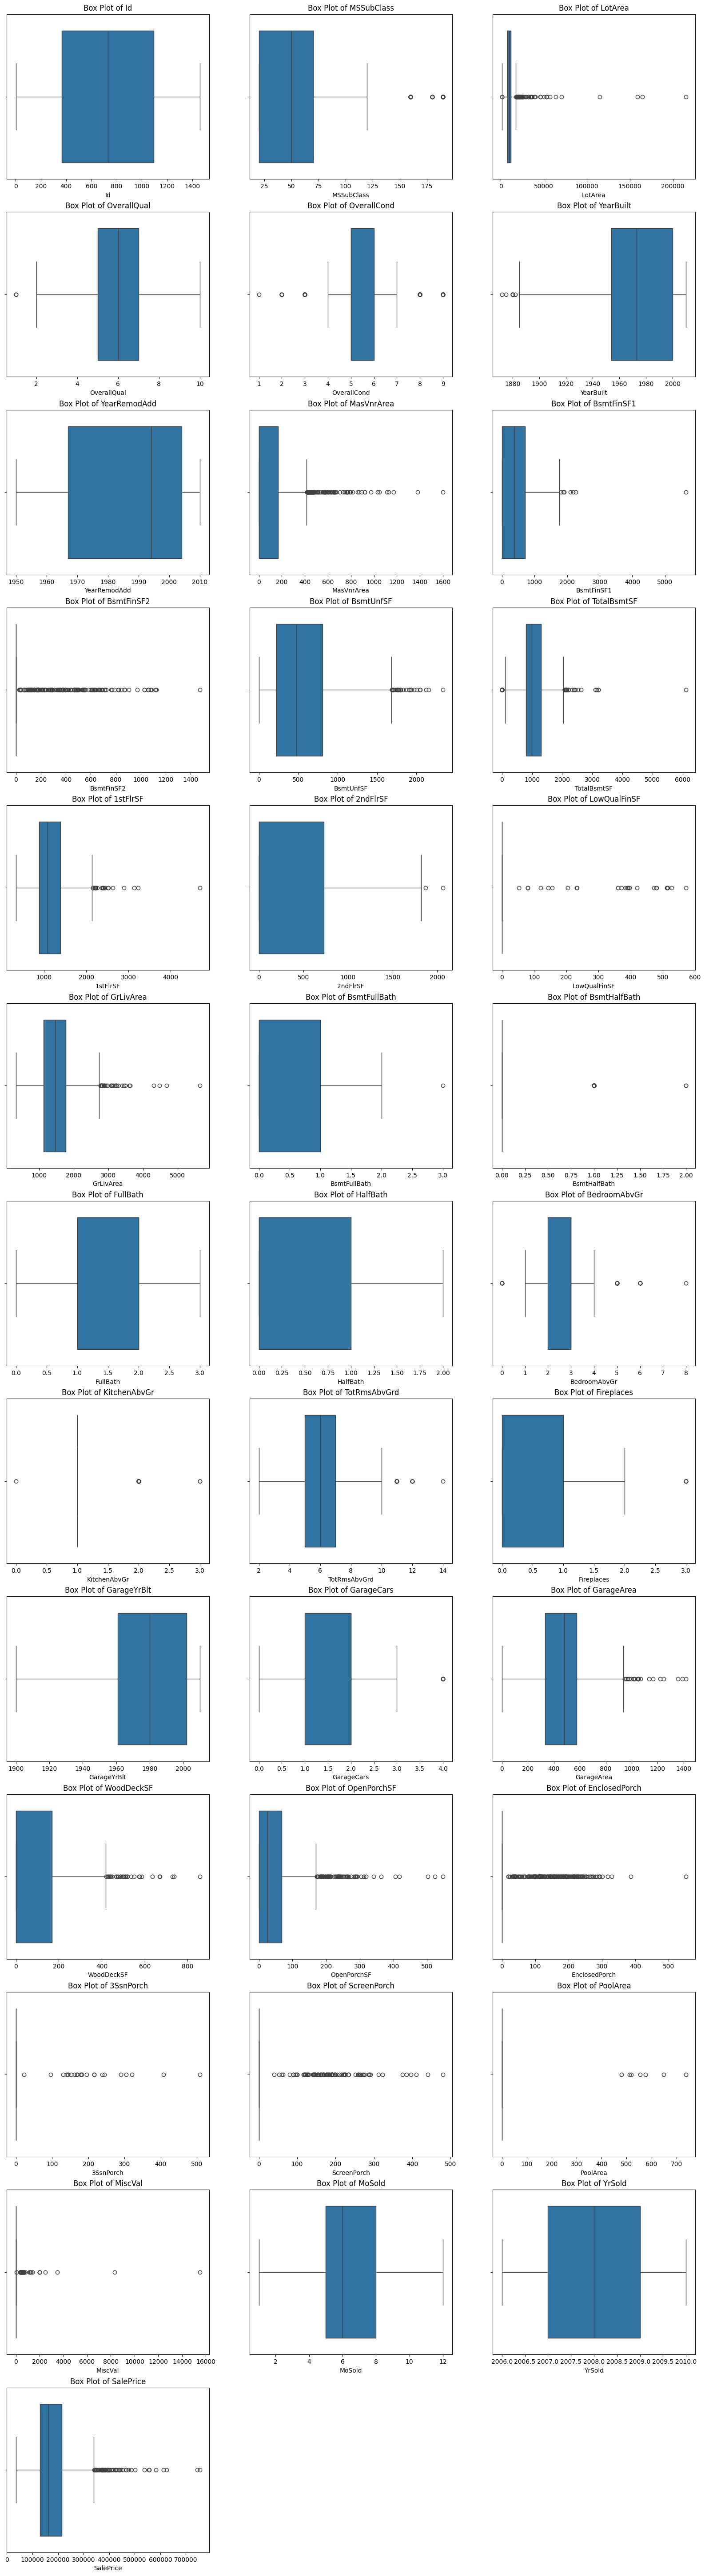

In [ ]:
plt.figure(figsize=(20, 80))
for n, feature in enumerate(numerical_features):
    plt.subplot(14, 3, n+1 )
    sns.boxplot(data=df_train_clean, x=feature)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
plt.show()

Si bien 30 de las 37 variables númericas presentan datos que se alejan del Rango Interquantil, todos los valores tienen sentido, por lo que no necesitamos eliminarlos.

# Correlación

Ahora que ya tenemos la data limpia, sin nulls, duplicados y outliers. Voy a indentificar que columnas tienen mayor correlación con la variable de Precio.

Text(0.5, 1.0, 'Correlation of Numeric Features with SalePrice')

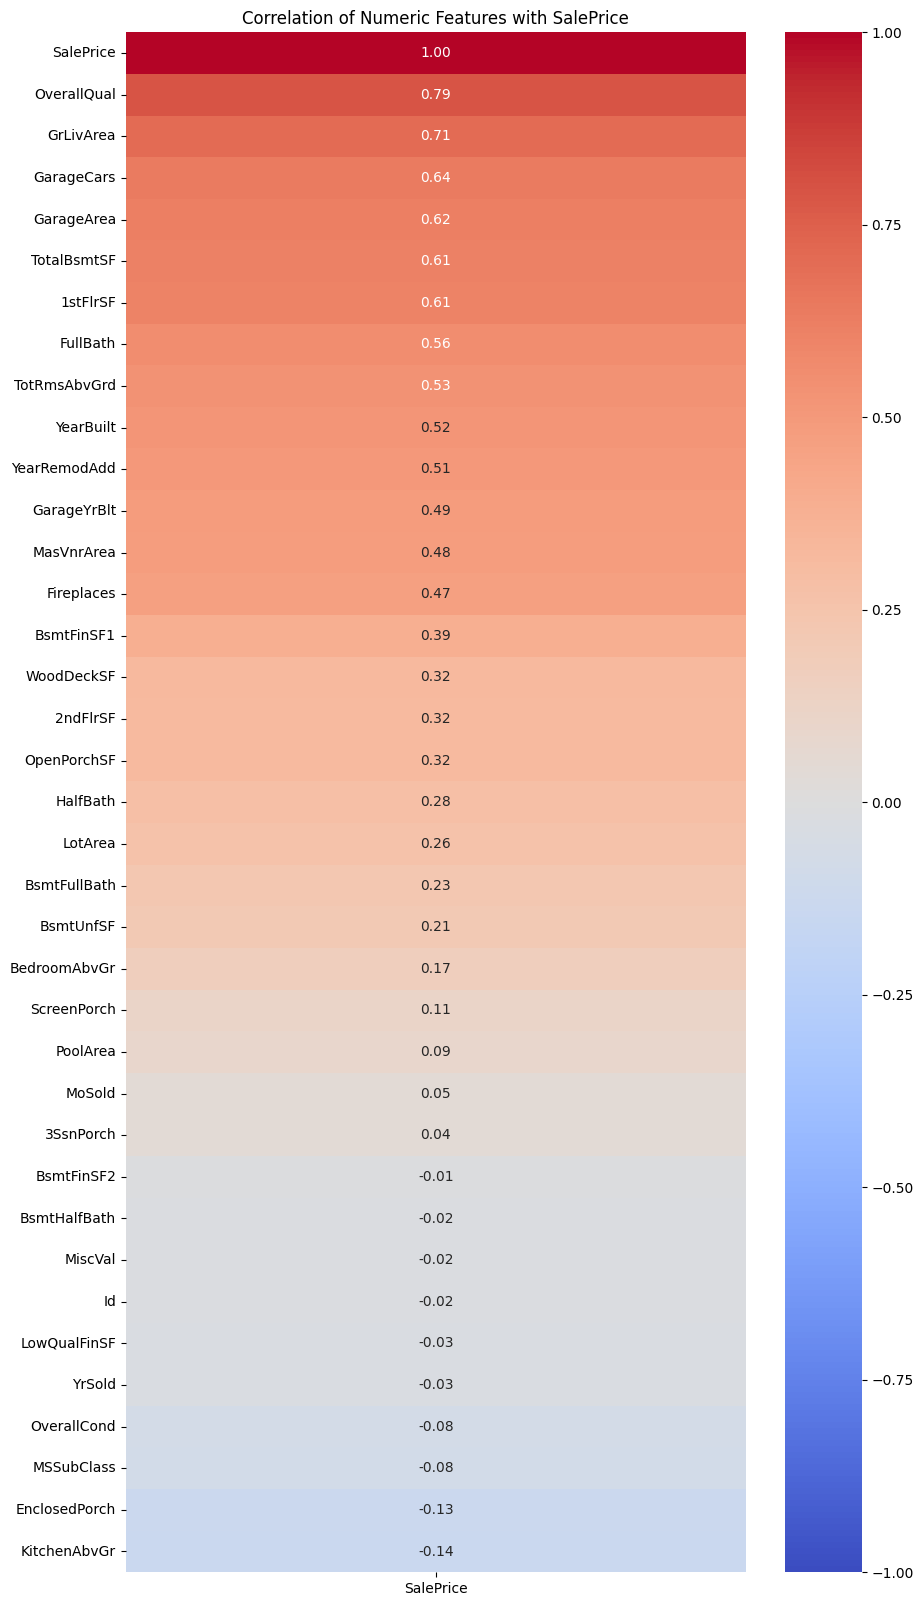

In [ ]:
correlations = numerical_features.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
# Plot heatmap of correlations
plt.figure(figsize=(10, 20))
sns.heatmap(
    correlations,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.title('Correlation of Numeric Features with SalePrice')

# Análisis del precio de Venta

Ahora vamos a ver cómo esta distribuido el precio de venta:

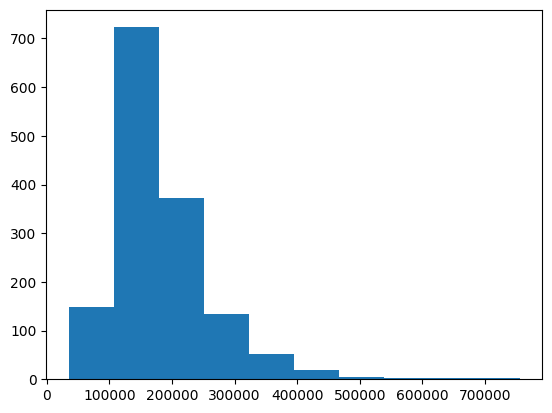

In [ ]:
plt.hist(df_train_clean['SalePrice'])
plt.show()

**Interpretación:** Se puede observar que la mayoría de casas se venden entre los 100,000 y los 200,000 dólares.



# Análisis de las 5 variables más relevantes


## OverallQual

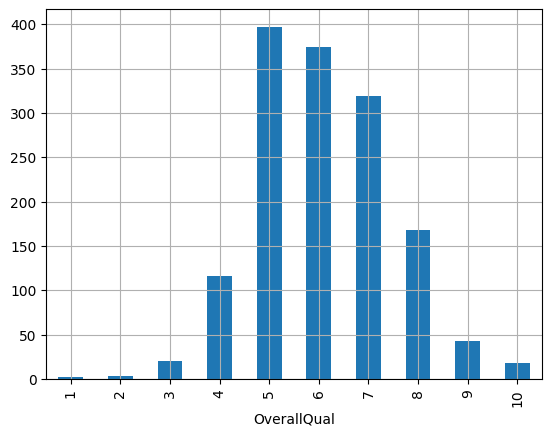

In [ ]:
#OverallQual = Califica el material general y el acabado de la casa (siendo 1 muy pobre y 10 muy excelente)
df_train_clean['OverallQual'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.grid()
plt.show()

**Interpretación:** La mayoría de propiedades tienen una calidad de materiales entre promedio (5) y bueno (7). Y tiene sentido que esto afecte en gran manera al precio, si los materiales son de mejor calidad las personas pagaran más por la casa.

## GrLivArea

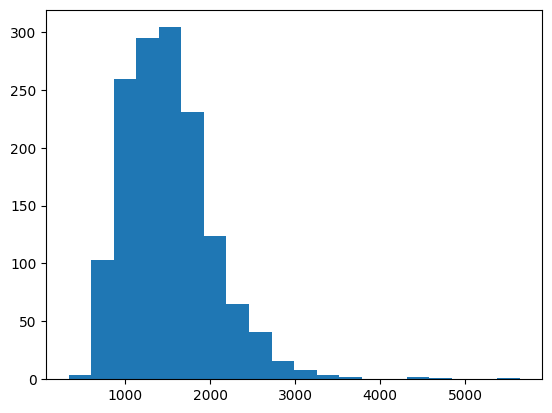

In [ ]:
#GrLivArea: Superficie habitable sobre el nivel del suelo en pies cuadrados
plt.hist(df_train_clean['GrLivArea'], bins=20)
plt.show()

**Interpretación:** La mayoría de las propiedades tienen entre 1000 y 2000 pies cuadrados habitables. También tiene sentido que las propiedades con mayor área hábitable sean las más costosas.

## GarageCars

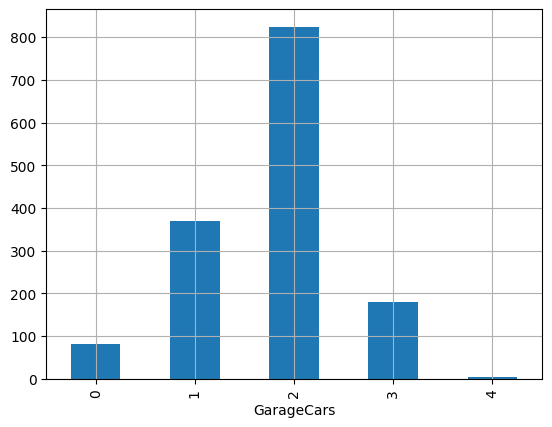

In [ ]:
#GarageCars: Tamaño del garage medido en número de carros
df_train_clean['GarageCars'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.grid()
plt.show()

**Interpretación:** La mayoría de las propiedades de la zona tienen 2 cocheras. Tiene una correlación de 0.64, esto nos quiere decir que mientras más cocheras el precio es mayor.

## GarageArea

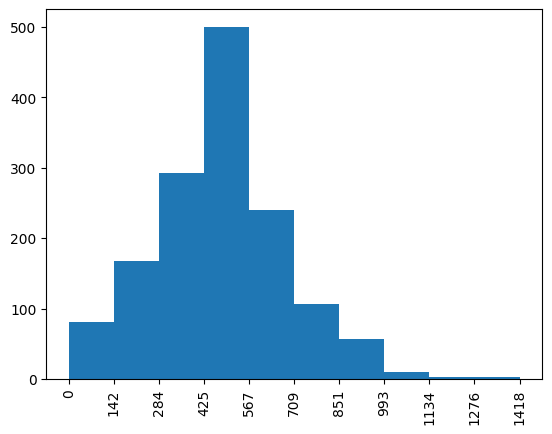

In [ ]:
#GarageArea: Tamaño del garage medido en pies cuadrados

# Calcula los límites de los bins
hist, bin_edges = np.histogram(df_train_clean['GarageArea'], bins=10)

# Crea el histograma
plt.hist(df_train_clean['GarageArea'], bins=bin_edges)

# Establece las etiquetas del eje x con los límites de los bins
plt.xticks(bin_edges, rotation=90)

plt.show()

**Interpretación:** La mayoría de los garages tienen un tamaño entre 284 y 709 pies cuadrados. Al igual, que en el caso anterior al tener una correlación de 0.62 nos indica que mientras mayor es el número de pies cuadrados el precio de la propiedad suele aumentar.

## TotalBsmtSF

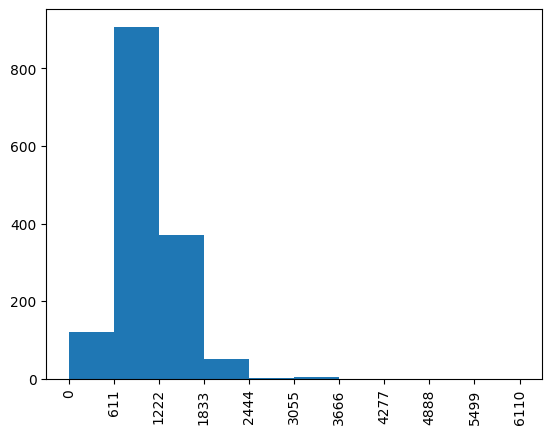

In [ ]:
#TotalBsmtSF: Pies cuadrados del área del sotano
# Calcula los límites de los bins
hist, bin_edges = np.histogram(df_train_clean['TotalBsmtSF'], bins=10)

# Crea el histograma
plt.hist(df_train_clean['TotalBsmtSF'], bins=bin_edges)

# Establece las etiquetas del eje x con los límites de los bins
plt.xticks(bin_edges, rotation=90)

plt.show()

**Interpretación:** La mayoría de viviendas tienen un zotano con un area entre 611 y 1222 pies cuadrados. Mientras más grande es el sotano el precio sube.

## 1stFlrSF

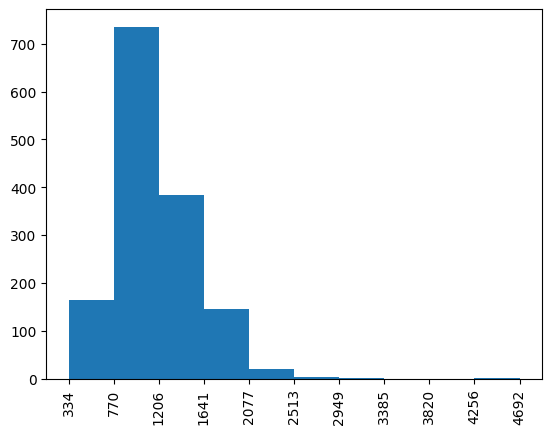

In [ ]:
#1stFlrSF: First Floor square feet

# Calcula los límites de los bins
hist, bin_edges = np.histogram(df_train_clean['1stFlrSF'], bins=10)

# Crea el histograma
plt.hist(df_train_clean['1stFlrSF'], bins=bin_edges)

# Establece las etiquetas del eje x con los límites de los bins
plt.xticks(bin_edges, rotation=90)

plt.show()

**Interpretación:** La mayoría de propiedades tienen una superficie del 1er piso entre 770 y 1206 pies cuadrados. Tiene sentido que mientras mayor sea el tamaño del 1er piso mayor sea el precio de la propiedad.

# Otas Variables de Interes

## MSZoning: ¿Qué tipo de propiedades se venden más?

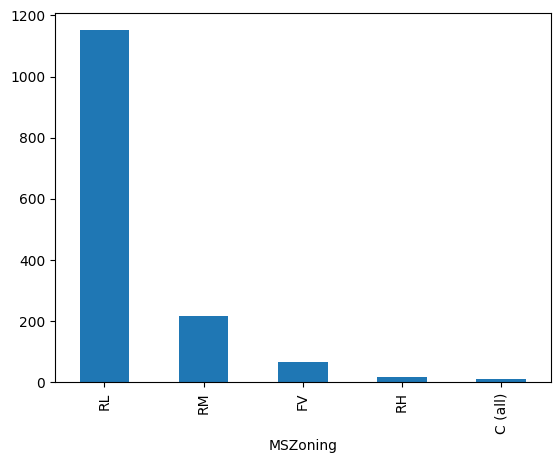

In [ ]:
df_train_clean['MSZoning'].value_counts().plot(kind='bar')
plt.show()

**Interpretación** Las propiedades que más se venden son del tipo Residencial Baja Densidad (RL), seguidas por Residencial de Media Densidad (RM).

## LotArea: ¿Cuál es el área de la propiedades más vendidas?

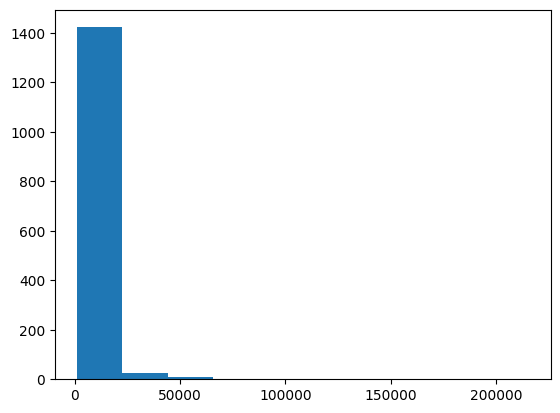

In [ ]:
#LotArea = Tamaño del lote en pies cuadrados
plt.hist(df_train_clean['LotArea'])
plt.show()

In [ ]:
df_train_clean['LotArea'][df_train_clean['LotArea']>100000]

,LotArea
249,159000
313,215245
335,164660
706,115149


In [ ]:
Solo existen 4 valores que superan los 100000 pies cuadrados. Los excluire para poder ver mejor la data

In [ ]:
df_train_clean['LotArea'][(df_train_clean['LotArea']<100000)&(df_train_clean['LotArea']>50000)]

,LotArea
53,50271
384,53107
451,70761
457,53227
769,53504
1298,63887
1396,57200


Y existen 7 valores entre 50000 y 100000 pies cuadrados.

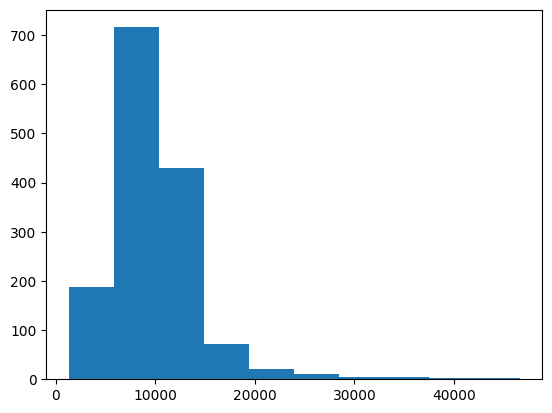

In [ ]:
plt.hist(df_train_clean['LotArea'][(df_train_clean['LotArea']<50000)])
plt.show()

In [ ]:
df_train_clean['LotArea'][(df_train_clean['LotArea']<50000)&(df_train_clean['LotArea']>20000)].count()

42

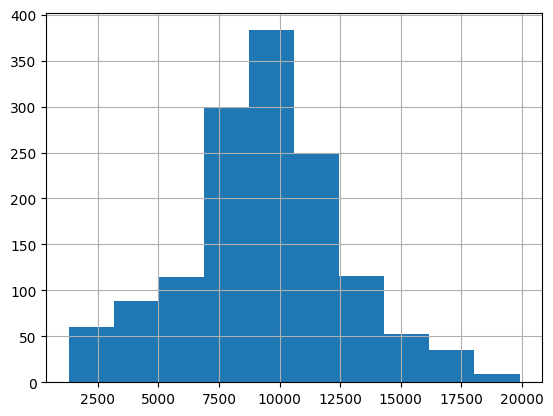

In [ ]:
plt.hist(df_train_clean['LotArea'][(df_train_clean['LotArea']<20000)])
plt.grid()
plt.show()

Las propiedades más vendidas son aquellas que tienen entre 7500 y 12500 pies cuadrados de área.

## Neighborhood: ¿Cuál es el vecindario más popular?


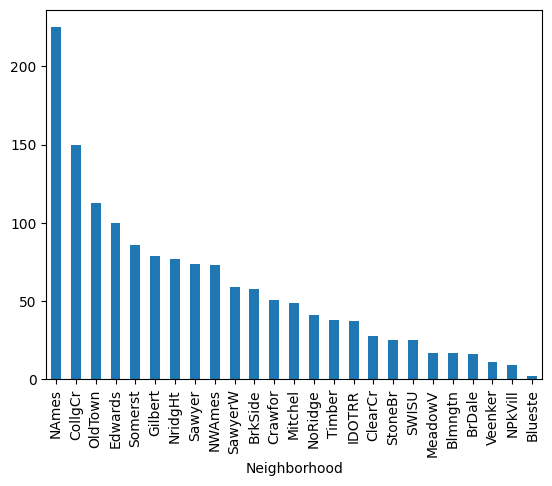

In [ ]:
df_train['Neighborhood'].value_counts().plot(kind='bar')
plt.show()

**Interpretación** El barrio más popular para comprar una propiedad es North Ames y el menos popular es Bluestem, sería interesante conocer por qué se debe esto.

##OverallCond: ¿Cuál es el estado general de las casas vendidas?

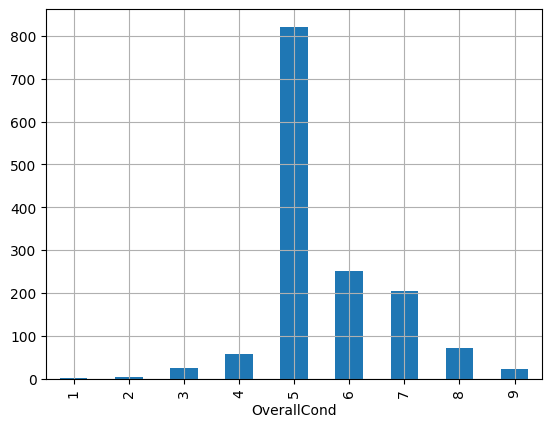

In [ ]:
#OverallCond (Califica el estado general de la casa siendo 1 muy pobre y 10 muy excelente.)
df_train['OverallCond'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.grid()
plt.show()

**Interpretación** Por lo general, la mayoría de las casas vendidas tenía un estado general promedio (5).



## YearBuilt: ¿Cuándo se construyeron las propiedades más vendidas?

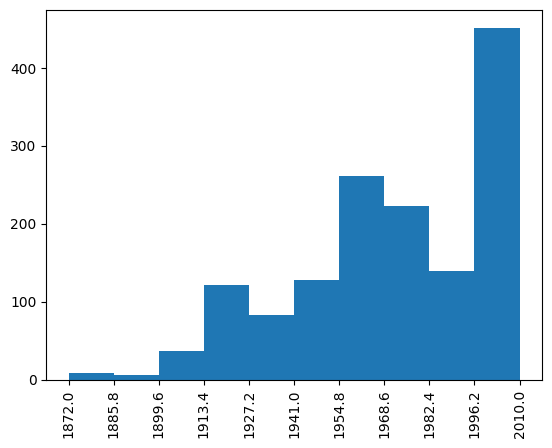

In [ ]:
# Calcula los límites de los bins
hist, bin_edges = np.histogram(df_train['YearBuilt'], bins=10)

# Crea el histograma
plt.hist(df_train['YearBuilt'], bins=bin_edges)

# Establece las etiquetas del eje x con los límites de los bins
plt.xticks(bin_edges, rotation=90)

plt.show()

**Interpretación** La mayoría de las casas vendidas fueron construidas entre 1996 y 2010

##YearRemodAdd: ¿Cuándo se remodelaron las casas?

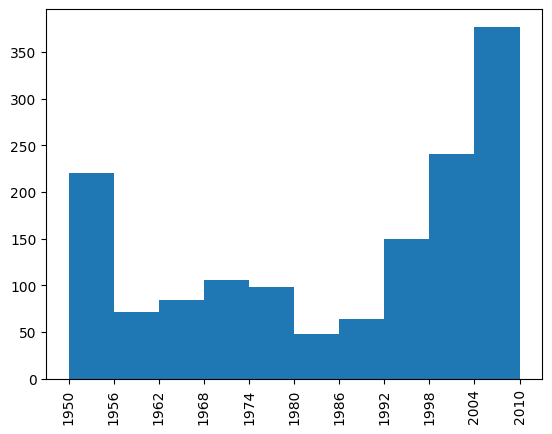

In [ ]:
#YearRemodAdd
# Calcula los límites de los bins
hist, bin_edges = np.histogram(df_train['YearRemodAdd'], bins=10)

# Crea el histograma
plt.hist(df_train['YearRemodAdd'], bins=bin_edges)

# Establece las etiquetas del eje x con los límites de los bins
plt.xticks(bin_edges, rotation=90)

plt.show()

**Interpretación** Las casas más antiguas fueron remodeladas en 1950 o en años posteriores. Y entre 2004 y 2010 se remodelaron más casas que fueron posteriormente vendidas.

## YrSold: ¿En qué años se vendieron las casas?

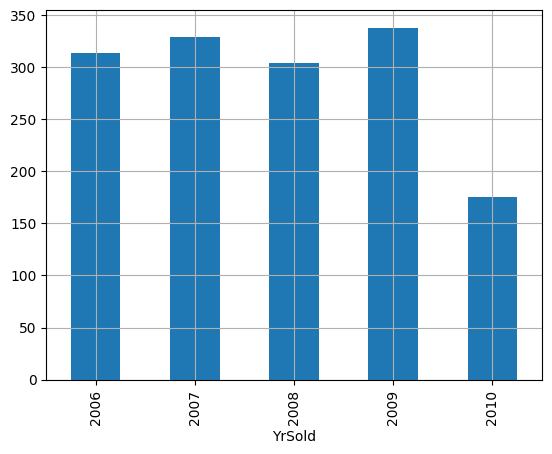

In [ ]:
#YrSold = Año de Venta
df_train['YrSold'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.grid()
plt.show()

**Interpretación** El mercado inmobiliario se ha mantenido constante durante 2006 a 2009. Bajando a la mitad en 2010. (Podría deberse a falta de datos de este año).

# Análisis de las propiedades más vendidas (<20000 pies cuadrados)

Apartir de acá trabajare solo con las propiedades que tienen menos de 20000 pies cuadrados de área.

In [ ]:
#¿Cuáles son las propiedades más caras con menos de 20000 pies cuadrados?
df_normal_houses=df_train_clean[(df_train['LotArea']<20000)]
df_normal_houses.sort_values('SalePrice',ascending=False).head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
898,899,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,New,Partial,611657
803,804,60,RL,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,192,0,0,1,2009,New,Partial,582933
1046,1047,60,RL,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,556581
440,441,20,RL,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,170,0,0,4,2009,WD,Normal,555000


**Interpretación** Estas son las 5 propiedades con un área menor a 20000 pies cuadrados con mayor precio de venta.

In [ ]:
df_normal_houses.groupby('Neighborhood').mean(numeric_only =True).sort_values('SalePrice',ascending=False).head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,
NoRidge,806.594595,52.972973,91.933333,12138.702703,7.837838,5.135135,1995.567568,1996.567568,382.297297,789.783784,...,183.270270,75.135135,32.405405,0.0,14.972973,15.0,0.0,6.486486,2007.837838,316678.594595
NridgHt,613.131579,62.105263,82.226667,10762.381579,8.250000,5.000000,2005.684211,2006.171053,326.733333,687.394737,...,153.697368,76.526316,0.000000,4.0,15.236842,0.0,0.0,6.894737,2007.842105,314680.052632
StoneBr,665.333333,84.166667,63.526316,8887.250000,8.166667,5.000000,1998.291667,1998.666667,165.250000,798.208333,...,150.875000,51.708333,27.000000,7.0,20.166667,0.0,0.0,7.708333,2007.833333,301019.791667
Timber,787.333333,36.060606,80.074074,12146.212121,7.363636,5.151515,1996.909091,1997.393939,168.454545,665.484848,...,135.636364,49.696970,10.393939,0.0,9.787879,0.0,0.0,5.939394,2007.787879,239992.515152
Veenker,675.400000,66.000000,58.333333,12139.500000,6.500000,6.400000,1982.500000,1990.100000,36.000000,720.900000,...,123.900000,48.000000,0.000000,0.0,62.000000,0.0,0.0,6.600000,2007.100000,224150.000000


<Axes: xlabel='Neighborhood'>

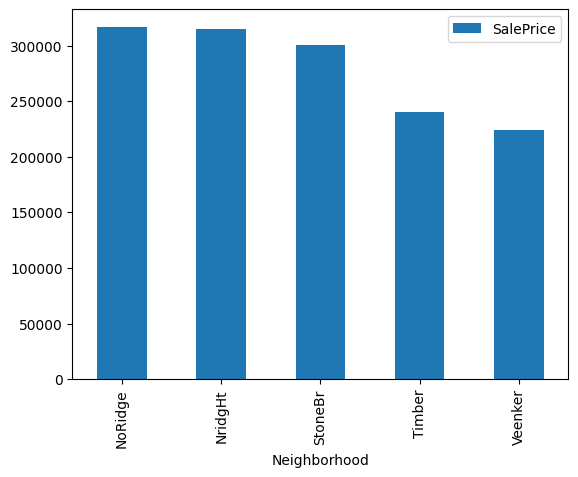

In [ ]:
df_normal_houses.groupby('Neighborhood')[['Neighborhood','SalePrice']].mean(numeric_only =True).sort_values('SalePrice',ascending=False).head(5).plot(kind='bar')

**Interpretación** Hay 3 vecindarios donde las propiedades menores a 20000 pies cuadrados son, en promedio, más costosas. Estos son: Northridge, Northridge Heights y Stone Brook.

In [ ]:
# Y si lo vemos por cuanto vale el pie cuadrado?
df_normal_houses["Price_squarefeet"]=df_normal_houses["SalePrice"]/df_normal_houses["LotArea"]
df_normal_houses.groupby('Neighborhood').mean(numeric_only =True).sort_values("Price_squarefeet",ascending=False).head(5)

<ipython-input-24-1a1c41ecaae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_houses["Price_squarefeet"]=df_normal_houses["SalePrice"]/df_normal_houses["LotArea"]


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Price_squarefeet
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Blueste,778.500000,160.000000,24.000000,1625.000000,6.000000,6.000000,1980.000000,1980.000000,0.000000,183.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,6.000000,2008.500000,137500.000000,86.410256
BrDale,719.187500,160.000000,21.562500,1801.000000,5.687500,5.437500,1971.437500,1973.625000,307.562500,250.437500,...,8.000000,0.0,0.0,0.000000,0.0,0.0,5.812500,2007.687500,104493.750000,58.323157
Blmngtn,773.941176,114.117647,47.142857,3398.176471,7.176471,5.000000,2005.235294,2005.764706,45.588235,196.000000,...,15.529412,0.0,0.0,8.470588,0.0,0.0,5.705882,2007.470588,194870.882353,57.643934
NPkVill,781.444444,142.222222,32.285714,3267.444444,6.000000,5.555556,1976.444444,1976.444444,0.000000,444.222222,...,41.666667,0.0,0.0,40.555556,0.0,0.0,6.666667,2008.666667,142694.444444,49.577688
MeadowV,733.000000,163.529412,27.800000,2324.000000,4.470588,5.529412,1972.588235,1976.705882,4.705882,391.176471,...,28.882353,0.0,0.0,0.000000,0.0,0.0,6.294118,2008.058824,98576.470588,45.394765


<Axes: xlabel='Neighborhood'>

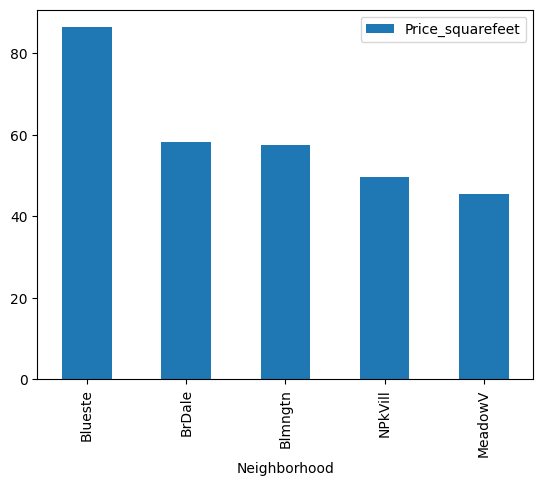

In [ ]:
df_normal_houses.groupby('Neighborhood')[['Neighborhood','Price_squarefeet']].mean(numeric_only =True).sort_values("Price_squarefeet",ascending=False).head(5).plot(kind='bar')

**Intepretación** Bluestem es el lugar donde el pie cuadrado tiene un mayor valor. Sin embargo, las propiedades en promedio suelen ser más pequeñas.

¿Qué tipo de propiedades se venden en blueste?

<Axes: xlabel='MSZoning'>

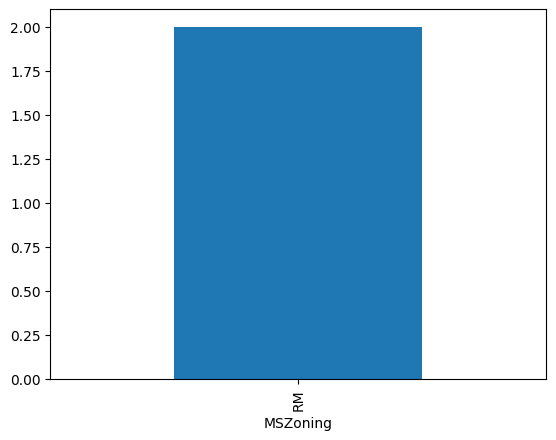

In [ ]:
df_normal_houses[df_normal_houses['Neighborhood']=='Blueste'].groupby('MSZoning')['MSZoning'].count().plot(kind='bar')

In [ ]:
df_normal_houses[df_normal_houses['Neighborhood']=='Blueste'].groupby('MSZoning')['MSZoning'].count()

,MSZoning
MSZoning,
RM,2


Solo hay dos propiedades y la zona es del tipo (Residenciales de Densidad media).

In [ ]:
df_normal_houses[df_normal_houses['Neighborhood']=='BrDale'].groupby('MSZoning')['MSZoning'].count()

,MSZoning
MSZoning,
RM,16


In [ ]:
# Y si lo vemos por cuanto vale el pie cuadrado?
df_normal_houses.groupby('MSZoning').mean(numeric_only =True).sort_values("Price_squarefeet",ascending=False).head(5)

<ipython-input-37-32c74fa46b9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_houses["Price_squarefeet"]=df_normal_houses["SalePrice"]/df_normal_houses["LotArea"]


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Price_squarefeet
MSZoning,,,,,,,,,,,,,,,,,,,,,
FV,707.030769,90.461538,6638.861538,7.200000,5.030769,2004.507692,2004.830769,140.806452,327.892308,0.000000,...,103.476923,0.000000,0.000000,3.046154,0.000000,0.000000,6.276923,2007.846154,214014.061538,39.409979
RM,700.285714,84.976959,6303.414747,5.433180,5.981567,1943.493088,1976.820276,56.428571,240.944700,28.903226,...,37.253456,49.981567,0.705069,8.741935,0.000000,36.497696,6.211982,2007.769585,124709.995392,25.966878
RH,860.437500,80.312500,7380.062500,5.250000,5.562500,1945.687500,1971.937500,57.812500,312.750000,8.687500,...,28.250000,58.687500,0.000000,0.000000,0.000000,0.000000,7.500000,2007.500000,131558.375000,20.051205
RL,735.856233,49.276615,10145.513194,6.179254,5.534122,1975.794359,1985.727025,109.122374,475.380346,51.976342,...,43.925387,16.297543,3.842584,16.658781,2.762511,48.917197,6.324841,2007.832575,188228.986351,19.760785
C (all),605.200000,56.000000,9501.300000,3.900000,4.600000,1924.100000,1958.200000,0.000000,222.800000,0.000000,...,64.400000,82.500000,0.000000,9.900000,0.000000,61.400000,7.700000,2008.300000,74528.000000,8.331825


**Interpretación:** Las zonas más caras son del tipo FV (Residencial Pueblo Flotante).

# Conclusiones



1.   **Características clave que influyen en el precio:** El precio de las propiedades está fuertemente influenciado por características como:
*   La calidad general de la propiedad (OverallQual).
*   El área habitable (GrLivArea).
*   El tamaño del garaje (GarageCars y GarageArea).
*   El área del zotano (TotalBsmtSF).

Estas características podrían ser puntos clave a considerar al momento de determinar el precio de una propiedad.

2.  **Zonas residenciales populares:** La mayoría de las casas vendidas se encuentran en zonas residenciales de baja y media densidad (RL y RM), siendo North Ames el vecindario más popular. Estas áreas son atractivas para los compradores y podrían ser de interés para futuros desarrollos inmobiliarios.

3.  **Análisis de propiedades con área menor a 20,000 pies cuadrados:** Los vecindarios de Northridge, Northridge Heights y Stone Brook tienen los precios promedio más altos para propiedades con un área menor a 20,000 pies cuadrados. El precio por pie cuadrado es más alto en Bluestem, aunque las propiedades en esta área suelen ser más pequeñas.

4.  **Zonas residenciales de tipo FV:** Las zonas residenciales de tipo FV (Residencial Pueblo Flotante) presentan el precio por pie cuadrado más alto, indicando una mayor demanda y exclusividad en este tipo de zonas.

